In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from ECM_model import ECM

In [2]:
model = ECM()

def eta_function(i):
    return 1 * (i >= 0) + 0.99 * (i < 0)
    
def M_function(i):
    return 0.1 * (i >= 0) - 0.1 * (i < 0)

parameter_values = pybamm.ParameterValues(
    {'Ambient temperature [K]': 298.15,
    'Capactior [F]': 38000, 
    'Charge efficiency': eta_function, 
    'Equivalent series resistance in R_0 [Ohm]': 0.0082,
    'Equivalent series resistance in R_1 [Ohm]': 0.0158,
    'Maximum polarisation due to hysteresis': M_function, 
    'Negative electrode thickness [m]': 8.52e-05, 
    'Negative particle radius [m]': 5.86e-06,
    'Nominal cell capacity [A.h]': 5.0,
    'Number of cells connected in series to make a battery': 1.0, 
    'Positive electrode thickness [m]': 7.56e-05,
    'Positive particle radius [m]': 5.22e-06,
    'Rate constant': 2,
    'Separator thickness [m]': 1.2e-05,
    'Total charge capacity [C]': 5,
    'citations': ['Chen2020']}
)

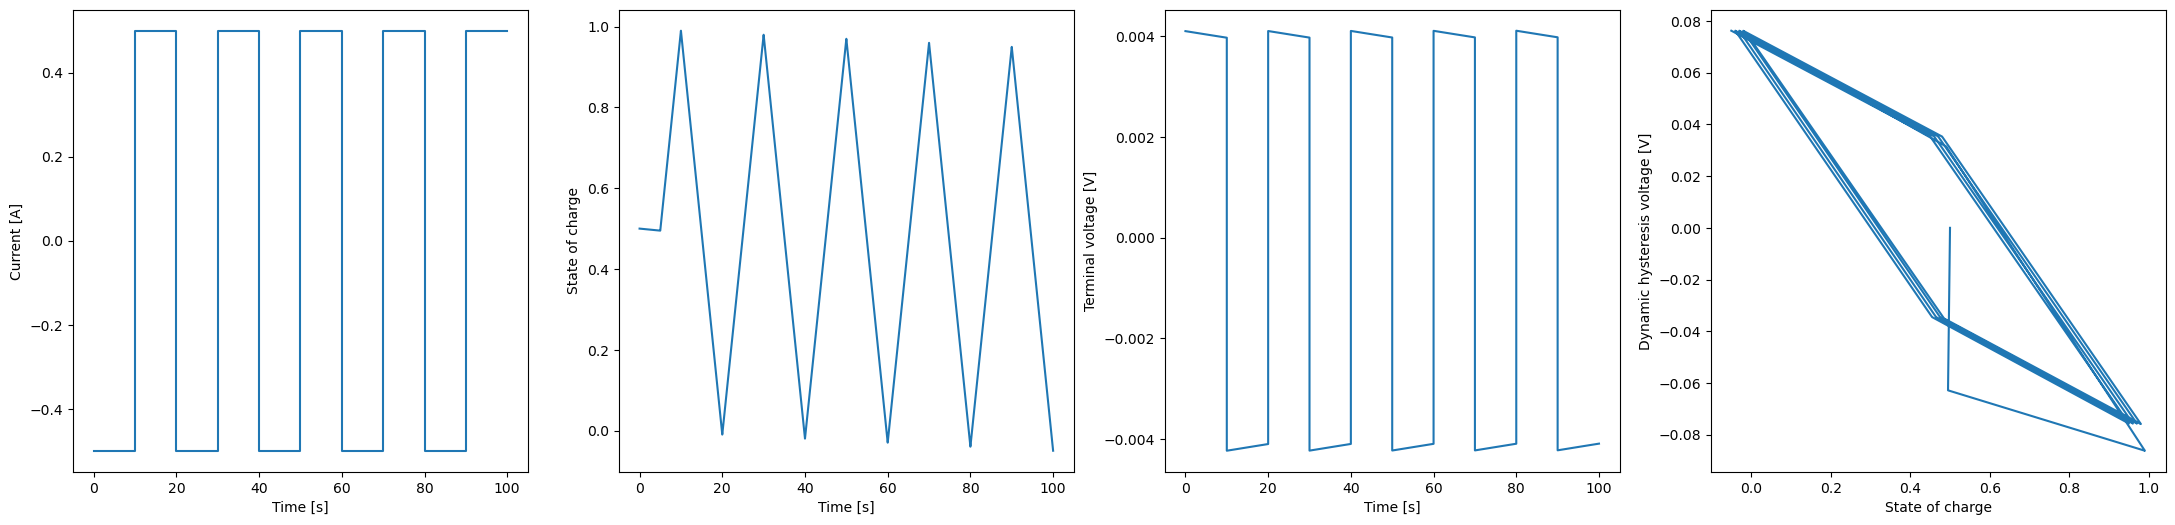

In [3]:
experiment = pybamm.Experiment(
    ([(f"Charge at C/10 for 5 seconds")] + [(f"Charge at C/10 for 5 seconds")]
    + [(f"Discharge at C/10 for 5 seconds")] + [(f"Discharge at C/10 for 5 seconds")])*5,
)

sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
sol = sim.solve(calc_esoh=False)

fig, ax = plt.subplots(1, 4, figsize=(27, 6))
t = sol["Time [s]"].data
i = sol["Current variable [A]"].data
V = sol["Battery voltage [V]"].data
h = sol["Dynamic hysteresis voltage [V]"].data
z = sol["State of charge"].data

ax[0].plot(t, i)
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Current [A]")

ax[1].plot(t, z)
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("State of charge")

ax[2].plot(t, V)
ax[2].set_xlabel("Time [s]")
ax[2].set_ylabel("Terminal voltage [V]")

ax[3].plot(z, h)
ax[3].set_xlabel("State of charge")
ax[3].set_ylabel("Dynamic hysteresis voltage [V]")

plt.show()

In [4]:
h

array([ 0.        , -0.06284144, -0.06284144, -0.08619085, -0.08619085,
        0.03150327,  0.03150327,  0.07480071,  0.07480071, -0.03504873,
       -0.03504873, -0.07586434, -0.07586434,  0.03530376,  0.03530376,
        0.07619832,  0.07619832, -0.03452941, -0.03452941, -0.07567139,
       -0.07567139,  0.03537474,  0.03537474,  0.07622443,  0.07622443,
       -0.03451971, -0.03451971, -0.07566779, -0.07566779,  0.03537607,
        0.03537607,  0.07622492,  0.07622492, -0.03451953, -0.03451953,
       -0.07566772, -0.07566772,  0.03537609,  0.03537609,  0.07622493])

In [5]:
z

array([ 0.5  ,  0.495,  0.495,  0.99 ,  0.99 ,  0.49 ,  0.49 , -0.01 ,
       -0.01 ,  0.485,  0.485,  0.98 ,  0.98 ,  0.48 ,  0.48 , -0.02 ,
       -0.02 ,  0.475,  0.475,  0.97 ,  0.97 ,  0.47 ,  0.47 , -0.03 ,
       -0.03 ,  0.465,  0.465,  0.96 ,  0.96 ,  0.46 ,  0.46 , -0.04 ,
       -0.04 ,  0.455,  0.455,  0.95 ,  0.95 ,  0.45 ,  0.45 , -0.05 ])

In [6]:
t

array([  0.,   5.,   5.,  10.,  10.,  15.,  15.,  20.,  20.,  25.,  25.,
        30.,  30.,  35.,  35.,  40.,  40.,  45.,  45.,  50.,  50.,  55.,
        55.,  60.,  60.,  65.,  65.,  70.,  70.,  75.,  75.,  80.,  80.,
        85.,  85.,  90.,  90.,  95.,  95., 100.])